In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as style
from matplotlib import cm
import numpy as np
from matplotlib.ticker import FuncFormatter





df = pd.read_excel("~/Desktop/task1.xlsx")
df

,Timestamp,Unnamed: 1,Dominant Leg,Kick a ball as far as possible,Stomp out fire on the floor,Draw a circle,Age,Race,Gender,Dominant Hand,...,How often do you play video games?,What types of game controllers have you used? Select all that apply.,What are the types of games you play? Select all that apply.,Please name some of your most played games in the past 5 years. Type N/A if not applicable.,Have you ever flown a drone/ RC helicopters/ RC planes?,Have you controlled/ navigated a robot or heavy machinery before?,In which country did you spend the most time growing up?,In which country did you spend the most time in the last 5 years?,Unnamed: 33,"If Others, please specify"
0,2018-08-21 14:52:31,NaN,Right-Legged,Kick with left leg,Stomp with either leg,Draw with either hand,55-64,Asian/ Pacific Islander,Male,Right-handed,...,Rarely,"Keyboard and mouse, Joystick, Touch screen","Stealth Shooter,Real-Time Strategy (RTS),Role ...","Dark Souls, Call of Duty","Yes, less than 10 times","No, never",USA,USA,NaN,NaN
1,2018-08-21 14:56:10.935000,NaN,Cross-Dominant,Kick with left leg,Stomp with either leg,Draw with left leg,18-24,White,Female,Right-handed,...,Daily,controller,"Real-Time Strategy (RTS),First Person Shooter ...","COD, Madden","Yes, more than 10 times","No, never",Canada,USA,NaN,NaN
2,2018-08-21 17:43:43.705000,NaN,Right-Legged,Kick with right leg,Stomp with right leg,Draw with either hand,35-44,White,Male,Right-handed,...,Rarely,prefer not ot answer,Prefer not to answer,"Madden,Halo","Yes, more than 10 times","Yes, more than 10 times",USA,USA,NaN,NaN
3,2018-08-21 17:51:47.423000,NaN,Ambi-Legged,Kick with left leg,Stomp with either leg,Draw with left leg,25-34,Hispanic/ Latino,Male,Cross-dominant (Mixed handed),...,Never,NaN,"Simulations/ Flight Simulators,Action,Prefer n...",NaN,"No, never","Yes, less than 10 times",USA,USA,NaN,NaN
4,2018-08-22 14:49:37.613000,NaN,Right-Legged,Kick with right leg,Stomp with either leg,Draw with right leg,35-44,White,Prefer not to say,Right-handed,...,Rarely,"Keyboard and mouse, Joystick, Touch screen, Mo...","Adventure,First Person Shooter (FPS),Action,St...",NaN,"Yes, more than 10 times","Yes, more than 10 times",Nepal,USA,NaN,NaN
5,2018-11-19 17:52:41,NaN,Left-Legged,Kick with left leg,Stomp with right leg,Draw with either hand,18-24,Asian/ Pacific Islander,Female,Left handed,...,Daily,prefer not ot answer,"Simulations/ Flight Simulators,Stealth Shooter...","Halo,GTA,PUBG,COD,Dark Souls,2K,Angry Birds,LO...","Yes, more than 10 times",Prefer not to answer,USA,Canada,NaN,NaN
6,2018-11-05 17:29:43,NaN,Left-Legged,Kick with left leg,Stomp with right leg,Draw with either hand,25-34,Hispanic/ Latino,Male,Other,...,Prefer not to answer,"Steering wheel,Joystick,Motion Sensor,Touch sc...","Stealth Shooter,First Person Shooter (FPS),Spo...","Madden,2K,Angry Birds,LOL,DRL,Halo,PUBG,GTA","Yes, less than 10 times",Prefer not to answer,USA,France,NaN,NaN
7,2018-10-22 14:35:34,NaN,Ambi-Legged,Kick with left leg,Stomp with right leg,Draw with right leg,25-34,Native American/ American Indian,Female,Right-handed,...,Never,"Motion Sensor,Trackball,Gamepad,Keyboard and m...",Real-Time Strategy (RTS),"2K,Halo,Madden,PUBG,LOL,COD","Yes, more than 10 times","No, never",USA,China,NaN,NaN
8,2018-10-27 18:10:59,NaN,Left-Legged,Other,Stomp with right leg,Draw with right leg,55-64,Hispanic/ Latino,Prefer not to say,Right-handed,...,Never,"Trackball,Touch screen","Adventure,Sports,First Person Shooter (FPS),Ac...","Madden,GTA,COD,Halo,LOL,2K,Dark Souls,Angry Bi...",Other,Prefer not to answer,USA,Japan,NaN,NaN
9,2018-10-12 15:07:52,NaN,Other,Kick with either leg,Stomp with either leg,Draw with either hand,25-34,Other,Male,NaN,...,Prefer not to answer,"Steering wheel,Gamepad,Motion Sensor,Trackball","Sports,Real-Time Strategy (RTS),First Person S...","2K,Halo,GTA,LOL,Angry Birds,Madden,COD",Prefer not to answer,"Yes, less than 10 times",USA,Malaysia,NaN,NaN


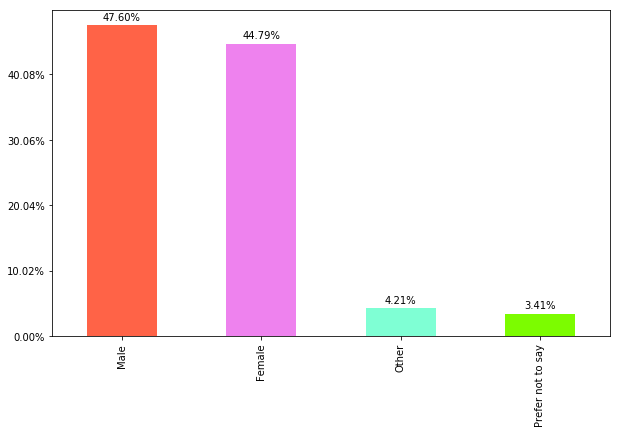

In [126]:
#generate distribution between male, female, intersex, unknown,other
#as bar and pie plot
total = df["Gender"].count()

def to_percent(y, position):
    s = str('%.2f'%(100 * (y/total)))
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
my_color =['tomato', 'violet', 'aquamarine', 'lawngreen','pink']
# get precentage for each entry
number = df["Gender"].value_counts()
number = [str('%.2f'%((x/total)*100)+"%") for x in number]
#plot the graph gender distribution
figure_1 = df["Gender"].value_counts().plot(kind = 'bar',color = my_color,figsize=(10,6))
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
#labeling each bar with precentage
rect = figure_1.patches
for r, l in zip(rect,number):
    height = r.get_height()
    figure_1.text(r.get_x() + r.get_width() / 2, height + 5, l,
        ha='center', va='bottom')
plt.show()


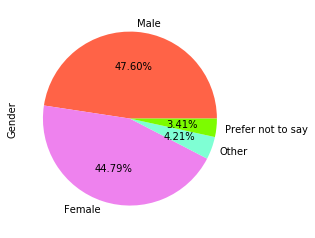

In [127]:
pieplot_gender = df["Gender"].value_counts().plot(kind ='pie',autopct = "%.2f%%",subplots = True,figsize=(8,4),colors = my_color)

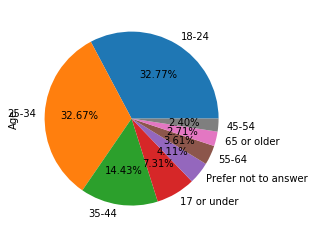

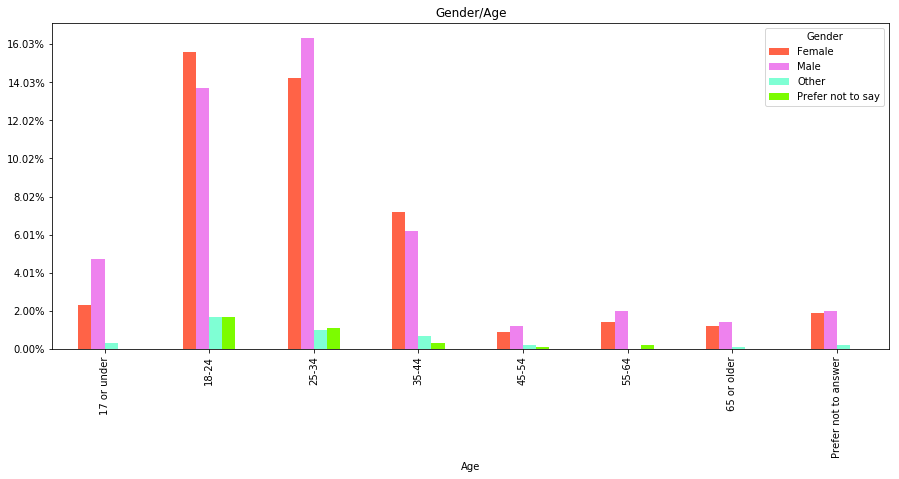

In [147]:
pieplot_age = df["Age"].value_counts().plot(kind ='pie',autopct = "%.2f%%",subplots=True,figsize=(8,4))
# age range and gender distribution combined 
fig_4 = df.groupby(['Age','Gender'])['Gender'].size().unstack().plot(kind='bar',figsize=(15,6),color = my_color,title = "Gender/Age")
label_4 = df['Age'].value_counts()
label_4 = [str('%.2f'%((x/total)*100)+"%") for x in label_4]
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
fig4.set_xlabel("total people")

plt.show()


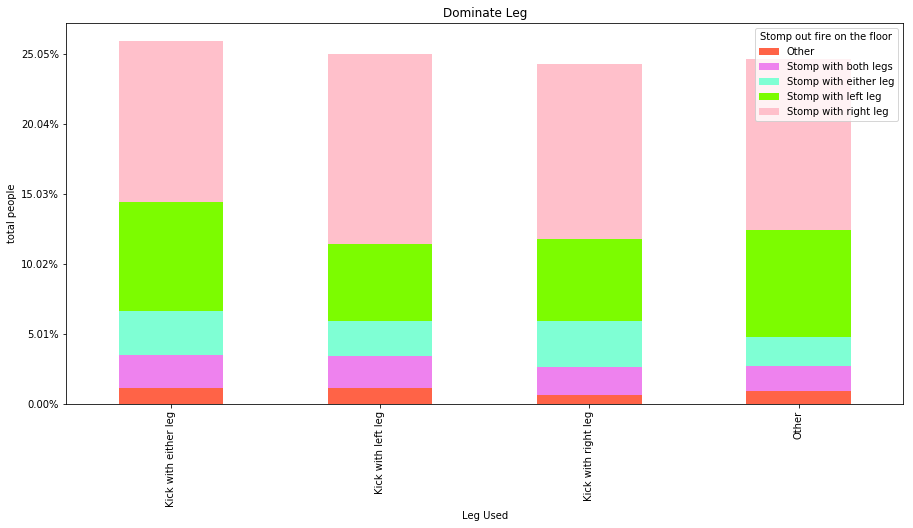

In [129]:
#feet usage distribution
fig_5 = df.groupby(["Kick a ball as far as possible",'Stomp out fire on the floor']).size().unstack().plot(kind='bar',figsize=(15,7),color =my_color ,title = "Dominate Leg",stacked =True)
fig_5.set_xlabel("Leg Used")
fig_5.set_ylabel("total people")
#label 
label_5 = df['Kick a ball as far as possible'].value_counts()
label_5 = [str('%.2f'%((x/total)*100)+"%") for x in label_5]
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

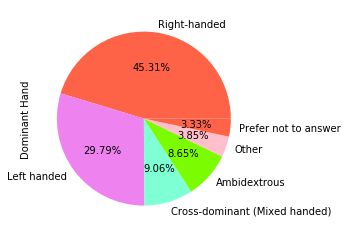

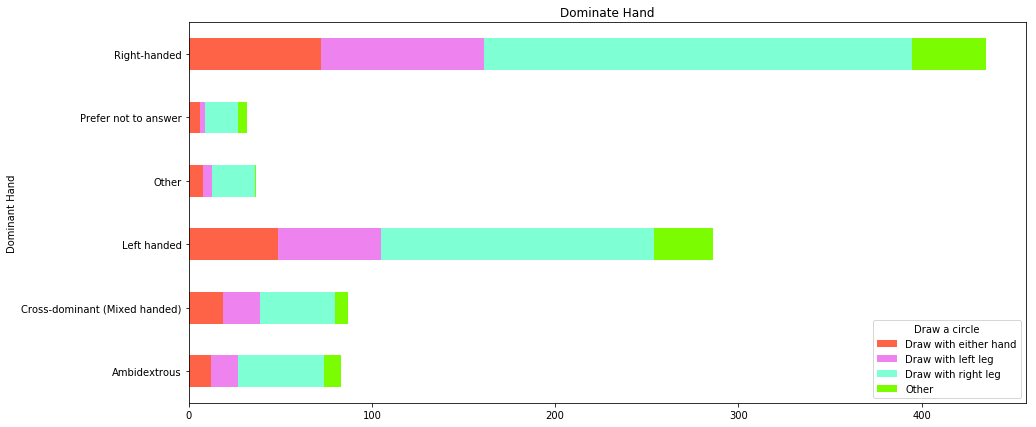

In [130]:
#Dominate hand & draw a circle
pieplot = df["Dominant Hand"].value_counts().plot(kind ='pie',autopct = "%.2f%%",subplots = True,figsize=(8,4),colors = my_color)
fig_6 = df.groupby(['Dominant Hand','Draw a circle'])['Dominant Hand']
fig_6.size().unstack().plot(kind='barh',figsize=(15,7),color = my_color,title = "Dominate Hand",stacked=True)

First Person Shooter (FPS)        670
Role Playing Game (RPG)           629
Sports                            622
Stealth Shooter                   542
Action                            538
Adventure                         509
Simulations/ Flight Simulators    493
Real-Time Strategy (RTS)          455
Puzzle                            357
Educational                       241
Other                             168
Prefer not to answer              150
N/A                               133
dtype: int64


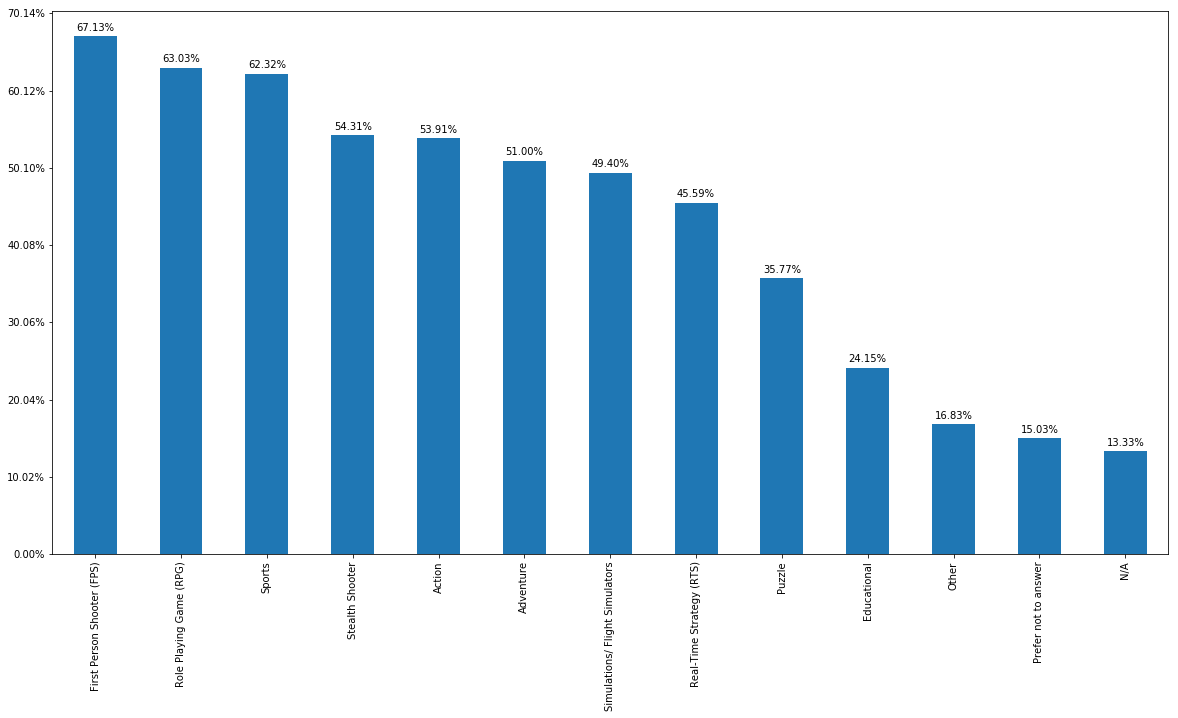

In [131]:
from collections import Counter
list = df['What are the types of games you play? Select all that apply.'].str.split(",")
list.dropna()
list = list.dropna()
tmp = []
for q in list:
    for x in q:
       tmp.append(x)

tmp = pd.Series(tmp)
label_7 = tmp.value_counts()
print(label_7)
label_7 = [str('%.2f'%((x/total)*100)+"%") for x in label_7]
fig_7 = tmp.value_counts().plot.bar(figsize=(20,10))
#label 
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
rect = fig_7.patches
for r, l in zip(rect,label_7):
    height = r.get_height()
    fig_7.text(r.get_x() + r.get_width() / 2, height + 5, l,
        ha='center', va='bottom')